In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import data
from dataset import rdDataset
from model import rdcnn
from math import log10


# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:1" if use_cuda else "cpu")
# cudnn.benchmark = True
path = './data'

# Parameters

params = {'test_split': .25,
          'shuffle_dataset': True,
          'batchsize': 32,
          'testBatchsize': 10,
          'random_seed': 42,
          'numworkers':16}
max_epoches = 100
learning_rate = 1e-3
drop_rate = 0.0

print('===> Loading datasets')
# Load All Dataset
dataset = rdDataset(path)

# Creating data indices for training and validation splits:
training_data_loader, testing_data_loader = data.DatasetSplit(dataset, **params)

print('===> Building model')
model = rdcnn(drop_rate).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)



def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
        optimizer.zero_grad()
        loss = criterion(model(input), target)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

#         print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(training_data_loader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(training_data_loader)))
    return epoch, epoch_loss / len(training_data_loader)
    
def test():
    avg_error = 0
    avg_loss = 0
    with torch.no_grad():
        for batch in testing_data_loader:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

            prediction = model(input)
            tmp_error = 0
#             print(len(prediction))
            for j in range(len(prediction)):
                tmp_error += torch.mean((prediction[j]-target[j])**2/torch.max(target[j]))
            avg_error += tmp_error / len(prediction)
            mse = criterion(prediction, target)
            avg_loss += mse
    print("===> Avg. Loss: {:.4f} ".format(avg_loss / len(testing_data_loader)))
    print("===> Avg. Error: {:.4f} ".format(avg_error / len(testing_data_loader)))
    return avg_loss / len(testing_data_loader),avg_error / len(testing_data_loader)

def checkpoint(epoch):
    model_out_path = "./checkpoint_largedata2/model_epoch_{}.pth".format(epoch)
    torch.save(model, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))
    
    

===> Loading datasets


TypeError: DatasetSplit() got an unexpected keyword argument 'testBatchsize'

===> Epoch 1 Complete: Avg. Loss: 0.0127
===> Avg. Loss: 0.0055 
===> Avg. Error: 0.0065 
Checkpoint saved to ./checkpoint_largedata2/model_epoch_1.pth
===> Epoch 2 Complete: Avg. Loss: 0.0047
===> Avg. Loss: 0.0047 
===> Avg. Error: 0.0055 
Checkpoint saved to ./checkpoint_largedata2/model_epoch_2.pth
===> Epoch 3 Complete: Avg. Loss: 0.0035
===> Avg. Loss: 0.0036 
===> Avg. Error: 0.0041 
Checkpoint saved to ./checkpoint_largedata2/model_epoch_3.pth
===> Epoch 4 Complete: Avg. Loss: 0.0027
===> Avg. Loss: 0.0025 
===> Avg. Error: 0.0030 
Checkpoint saved to ./checkpoint_largedata2/model_epoch_4.pth
===> Epoch 5 Complete: Avg. Loss: 0.0022
===> Avg. Loss: 0.0031 
===> Avg. Error: 0.0035 
Checkpoint saved to ./checkpoint_largedata2/model_epoch_5.pth
===> Epoch 6 Complete: Avg. Loss: 0.0020
===> Avg. Loss: 0.0018 
===> Avg. Error: 0.0021 
Checkpoint saved to ./checkpoint_largedata2/model_epoch_6.pth
===> Epoch 7 Complete: Avg. Loss: 0.0018
===> Avg. Loss: 0.0015 
===> Avg. Error: 0.0017

KeyboardInterrupt: 

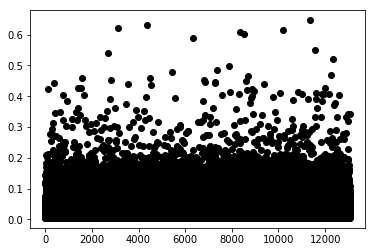

In [6]:
L_train_loss = []
L_test_loss = []
L_test_error = []
for epoch in range(1, max_epoches + 1):
    train_loss = train(epoch)
    test_loss,test_error = test()
    checkpoint(epoch)
    data.TestErrorPlot(model,device, testing_data_loader)
    L_train_loss.append(train_loss)
    L_test_loss.append(test_loss)
    L_test_error.append(test_error)

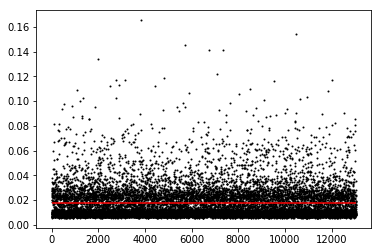

In [14]:
import importlib 
importlib.reload(data)
data.TestErrorPlot(model,device, testing_data_loader)

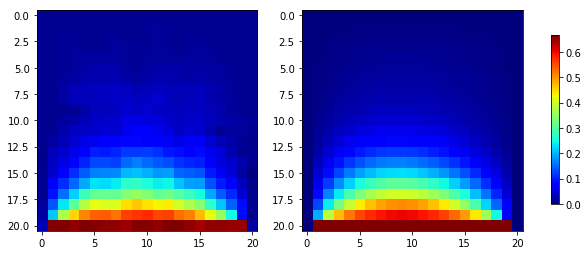

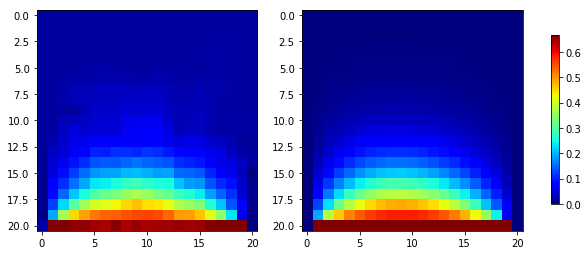

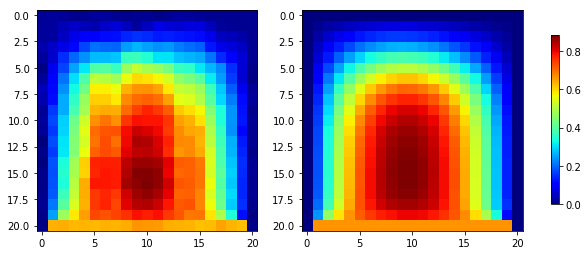

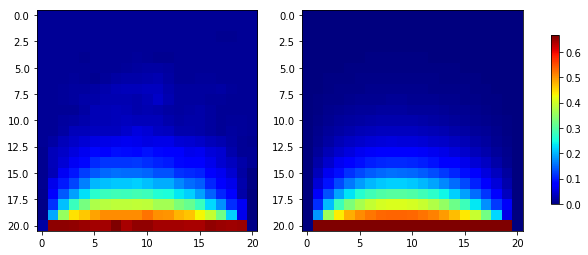

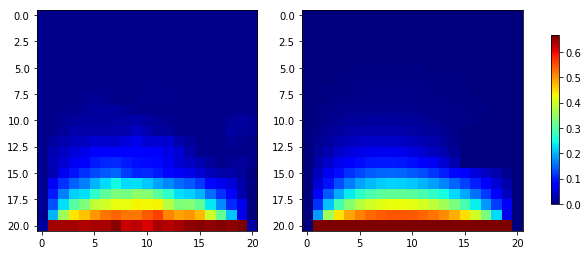

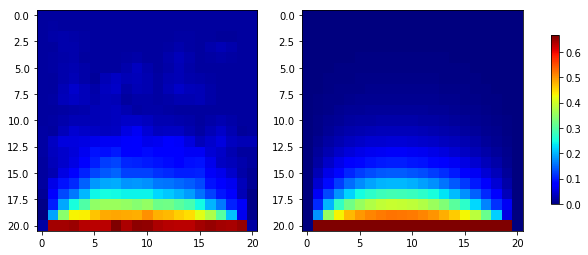

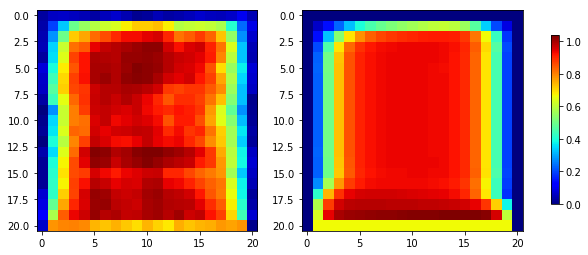

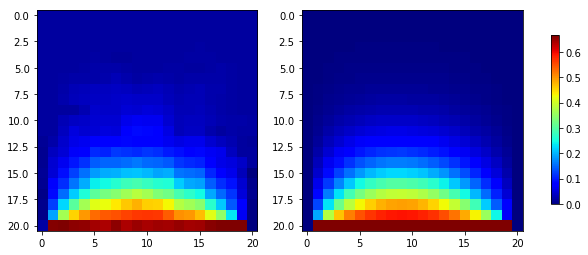

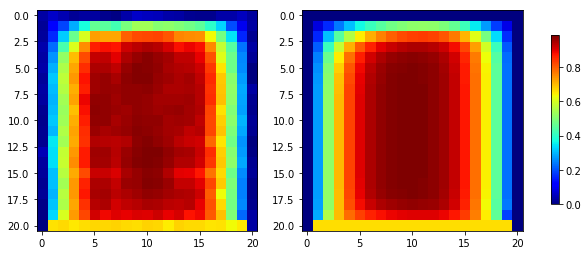

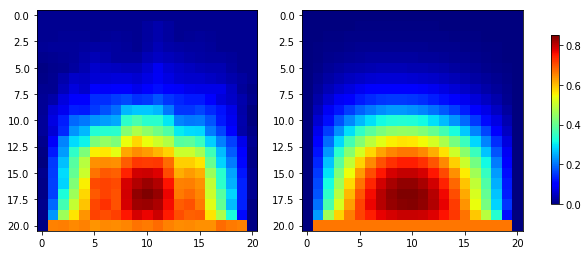

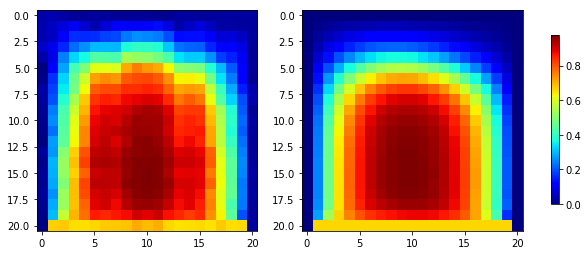

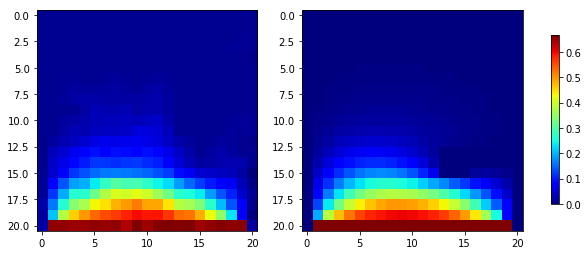

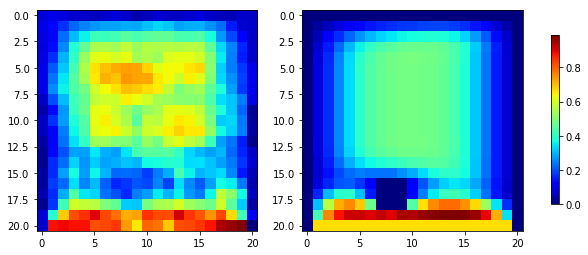

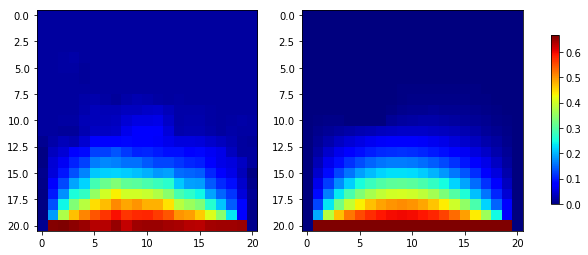

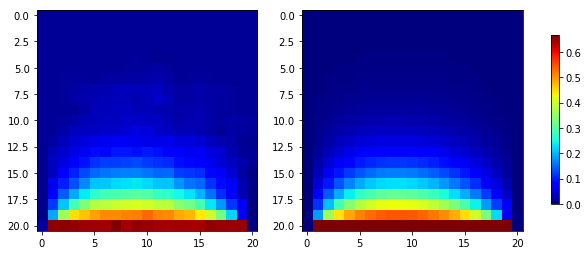

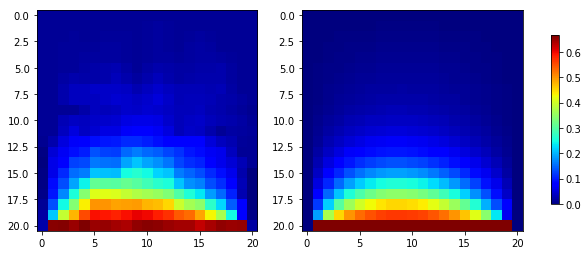

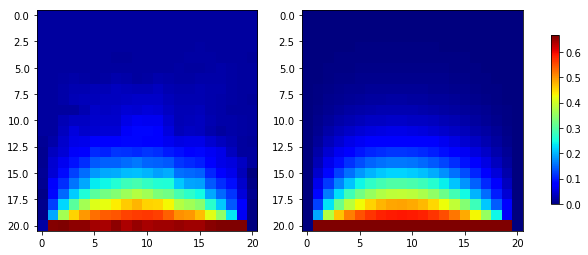

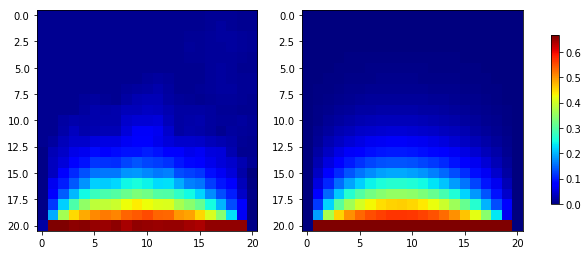

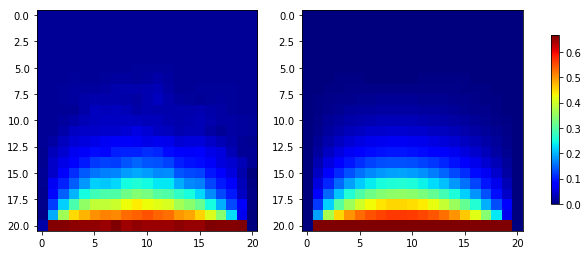

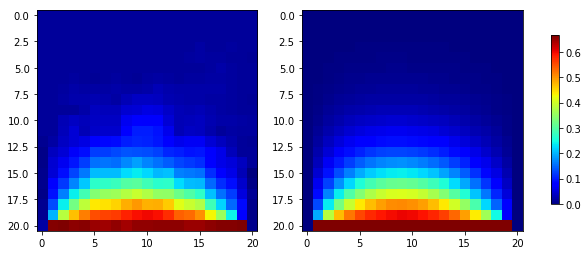

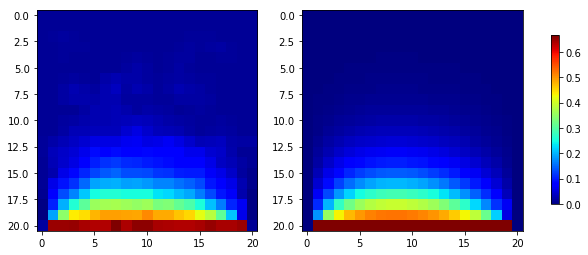

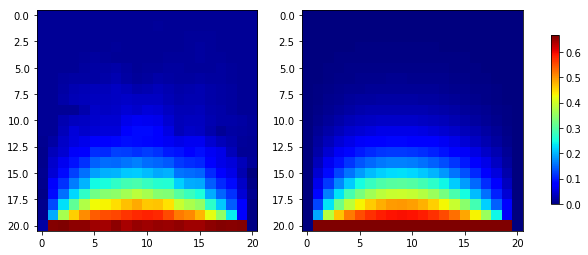

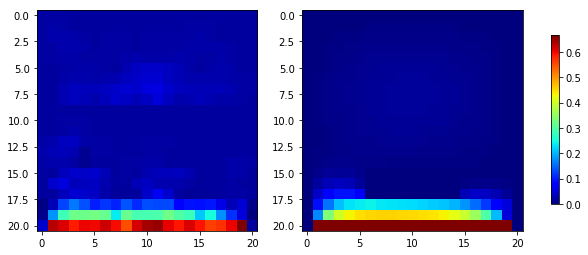

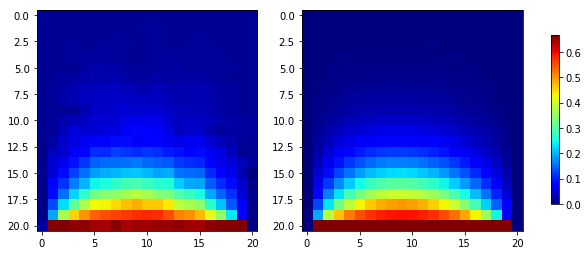

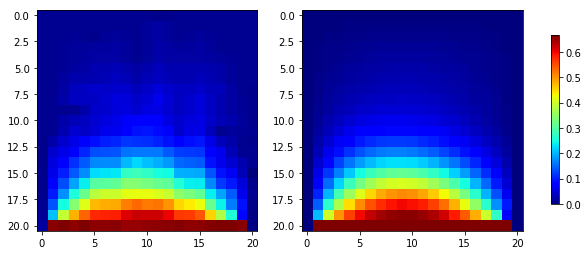

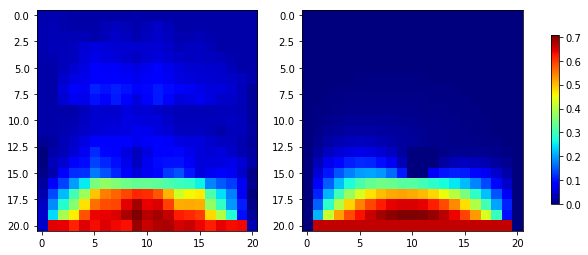

In [11]:
from matplotlib import pyplot as plt
with torch.no_grad():
    for batch in testing_data_loader:
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

        prediction = model(input)
        
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction[t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target[t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()

# Improved balance data


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import data
from dataset import rdDataset
from model import rdcnn
from math import log10


# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:1" if use_cuda else "cpu")
# cudnn.benchmark = True
path = './data'

# Parameters

params = {'test_split': .25,
          'shuffle_dataset': True,
          'batchsize': 32,
          'testBatchsize': 10,
          'random_seed': 42,
          'numworkers':16}
max_epoches = 100
learning_rate = 1e-3
drop_rate = 0.0

print('===> Loading datasets')
# Load All Dataset
dataset = rdDataset(path)

# Creating data indices for training and validation splits:
training_data_loader, testing_data_loader = data.DatasetSplit(dataset, **params)

print('===> Building model')
model = rdcnn(drop_rate).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)



def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
        optimizer.zero_grad()
        loss = criterion(model(input), target)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

#         print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(training_data_loader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(training_data_loader)))
    return epoch, epoch_loss / len(training_data_loader)
    
def test():
    avg_error = 0
    avg_loss = 0
    with torch.no_grad():
        for batch in testing_data_loader:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

            prediction = model(input)
            tmp_error = 0
#             print(len(prediction))
            for j in range(len(prediction)):
                tmp_error += torch.mean((prediction[j]-target[j])**2/torch.max(target[j]))
            avg_error += tmp_error / len(prediction)
            mse = criterion(prediction, target)
            avg_loss += mse
    print("===> Avg. Loss: {:.4f} ".format(avg_loss / len(testing_data_loader)))
    print("===> Avg. Error: {:.4f} ".format(avg_error / len(testing_data_loader)))
    return avg_loss / len(testing_data_loader),avg_error / len(testing_data_loader)

def checkpoint(epoch):
    model_out_path = "./checkpoint_largedata3/model_epoch_{}.pth".format(epoch)
    torch.save(model, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))
    
    

===> Loading datasets
===> Building model


In [4]:
L_train_loss = []
L_test_loss = []
L_test_error = []
for epoch in range(1, max_epoches + 1):
    train_loss = train(epoch)
    test_loss,test_error = test()
    checkpoint(epoch)
#     data.TestErrorPlot(model,device, testing_data_loader)
    L_train_loss.append(train_loss)
    L_test_loss.append(test_loss)
    L_test_error.append(test_error)

===> Epoch 1 Complete: Avg. Loss: 0.0346
===> Avg. Loss: 0.0273 
===> Avg. Error: 0.0319 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_1.pth
===> Epoch 2 Complete: Avg. Loss: 0.0257
===> Avg. Loss: 0.0231 
===> Avg. Error: 0.0274 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_2.pth
===> Epoch 3 Complete: Avg. Loss: 0.0211
===> Avg. Loss: 0.0186 
===> Avg. Error: 0.0214 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_3.pth
===> Epoch 4 Complete: Avg. Loss: 0.0181
===> Avg. Loss: 0.0175 
===> Avg. Error: 0.0203 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_4.pth
===> Epoch 5 Complete: Avg. Loss: 0.0166
===> Avg. Loss: 0.0160 
===> Avg. Error: 0.0177 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_5.pth
===> Epoch 6 Complete: Avg. Loss: 0.0156
===> Avg. Loss: 0.0161 
===> Avg. Error: 0.0185 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_6.pth
===> Epoch 7 Complete: Avg. Loss: 0.0151
===> Avg. Loss: 0.0144 
===> Avg. Error: 0.0160

===> Epoch 55 Complete: Avg. Loss: 0.0088
===> Avg. Loss: 0.0094 
===> Avg. Error: 0.0106 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_55.pth
===> Epoch 56 Complete: Avg. Loss: 0.0087
===> Avg. Loss: 0.0086 
===> Avg. Error: 0.0098 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_56.pth
===> Epoch 57 Complete: Avg. Loss: 0.0087
===> Avg. Loss: 0.0090 
===> Avg. Error: 0.0100 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_57.pth
===> Epoch 58 Complete: Avg. Loss: 0.0087
===> Avg. Loss: 0.0091 
===> Avg. Error: 0.0102 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_58.pth
===> Epoch 59 Complete: Avg. Loss: 0.0086
===> Avg. Loss: 0.0087 
===> Avg. Error: 0.0099 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_59.pth
===> Epoch 60 Complete: Avg. Loss: 0.0085
===> Avg. Loss: 0.0083 
===> Avg. Error: 0.0095 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_60.pth
===> Epoch 61 Complete: Avg. Loss: 0.0086
===> Avg. Loss: 0.0086 
===> Avg. 

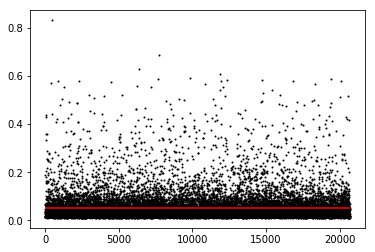

In [5]:
import importlib 
importlib.reload(data)
data.TestErrorPlot(model,device, testing_data_loader)

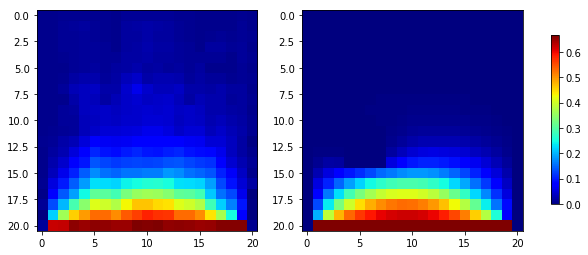

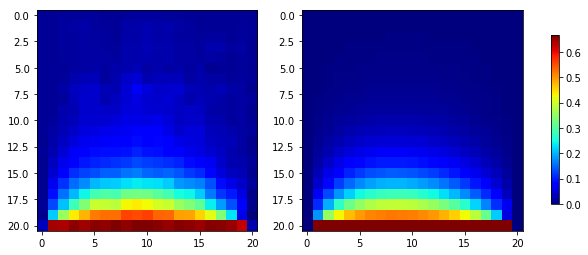

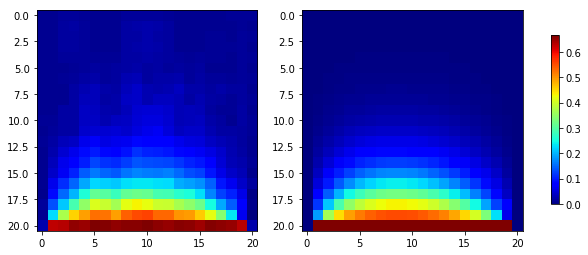

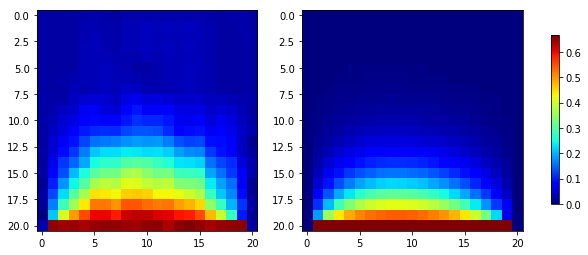

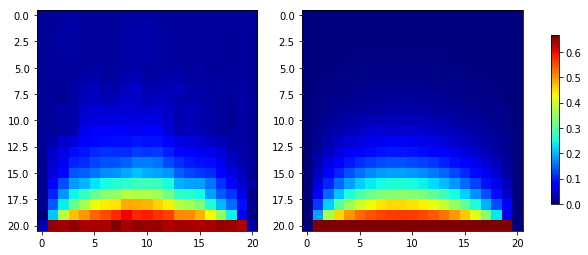

In [6]:
from matplotlib import pyplot as plt
with torch.no_grad():
    for batch in testing_data_loader:
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

        prediction = model(input)
        
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction[t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target[t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()